In [1]:
import pylab as pl
import pandas as pd
import numpy as np
from getCitiBikeCSV import getCitiBikeCSV
%pylab inline

import os
import scipy.stats
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201505'
getCitiBikeCSV(datestring)

file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2


In [4]:
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,415,5/1/2015 00:00:11,5/1/2015 00:07:06,477,W 41 St & 8 Ave,40.756405,-73.990026,442,W 27 St & 7 Ave,40.746647,-73.993915,17012,Subscriber,1981.0,1,2015-05-01 00:00:11
1,1523,5/1/2015 00:00:28,5/1/2015 00:25:52,293,Lafayette St & E 8 St,40.730287,-73.990765,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,17390,Customer,NaN,0,2015-05-01 00:00:28
2,642,5/1/2015 00:00:52,5/1/2015 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990.0,1,2015-05-01 00:00:52
3,367,5/1/2015 00:00:48,5/1/2015 00:06:55,537,Lexington Ave & E 24 St,40.740259,-73.984092,280,E 10 St & 5 Ave,40.733320,-73.995101,14788,Subscriber,1978.0,1,2015-05-01 00:00:48
4,2734,5/1/2015 00:00:51,5/1/2015 00:46:26,426,West St & Chambers St,40.717548,-74.013221,327,Vesey Pl & River Terrace,40.715338,-74.016584,21068,Subscriber,1956.0,2,2015-05-01 00:00:51


In [5]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [6]:
df = df[df.age <= 100]

In [7]:
df.age.astype('float64', raise_on_error = False)

0         34.0
2         25.0
3         37.0
4         59.0
5         54.0
6         44.0
7         22.0
8         57.0
9         50.0
11        41.0
13        29.0
14        46.0
15        34.0
16        44.0
18        28.0
19        34.0
20        45.0
21        25.0
22        26.0
23        36.0
24        52.0
25        25.0
26        26.0
27        20.0
28        39.0
29        45.0
30        64.0
31        26.0
32        31.0
33        31.0
          ... 
961952    71.0
961954    26.0
961956    47.0
961957    25.0
961958    49.0
961959    49.0
961961    51.0
961962    18.0
961963    30.0
961964    26.0
961965    34.0
961966    25.0
961967    48.0
961968    31.0
961969    34.0
961970    33.0
961971    33.0
961972    28.0
961973    25.0
961974    28.0
961975    35.0
961976    30.0
961977    49.0
961979    33.0
961980    36.0
961981    37.0
961982    56.0
961983    51.0
961984    30.0
961985    30.0
Name: age, dtype: float64

In [8]:
df.age.dropna

<bound method Series.dropna of 0         34.0
2         25.0
3         37.0
4         59.0
5         54.0
6         44.0
7         22.0
8         57.0
9         50.0
11        41.0
13        29.0
14        46.0
15        34.0
16        44.0
18        28.0
19        34.0
20        45.0
21        25.0
22        26.0
23        36.0
24        52.0
25        25.0
26        26.0
27        20.0
28        39.0
29        45.0
30        64.0
31        26.0
32        31.0
33        31.0
          ... 
961952    71.0
961954    26.0
961956    47.0
961957    25.0
961958    49.0
961959    49.0
961961    51.0
961962    18.0
961963    30.0
961964    26.0
961965    34.0
961966    25.0
961967    48.0
961968    31.0
961969    34.0
961970    33.0
961971    33.0
961972    28.0
961973    25.0
961974    28.0
961975    35.0
961976    30.0
961977    49.0
961979    33.0
961980    36.0
961981    37.0
961982    56.0
961983    51.0
961984    30.0
961985    30.0
Name: age, dtype: float64>

In [9]:
print ("age rider dis on normal dis", scipy.stats.kstest(df.age,'norm'))

age rider dis on normal dis KstestResult(statistic=1.0, pvalue=0.0)


### Standardize the age distribution to a distribution with mean value of zero and standard deviation of 1

In [10]:
dis_age = (df.age - df.age.mean())/df.age.std()

### Compared the standardized age distribution with the Normal distribution (mean = 0, std = 1) using two tests

### Null Hypothesis: The biker age distribution follows the Normal distribution
Significance level: 5%

### The KS Test

In [11]:
print ("age dis on normal dis", scipy.stats.kstest(dis_age,'norm'))

age dis on normal dis KstestResult(statistic=0.10273245786261104, pvalue=0.0)


### Since the p-value (~0.0) is smaller than the significance level 5%, we are able to reject the null hypothesis.

### The Anderson Test

In [12]:
print ("age dis on normal dis", scipy.stats.anderson(dis_age, dist='norm'))

age dis on normal dis AndersonResult(statistic=10944.828840559814, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### Since the statistic coefficient value is larger than 0.656 (The statistic coefficient for the significance level 5%), we are able to reject the null hypothesis.

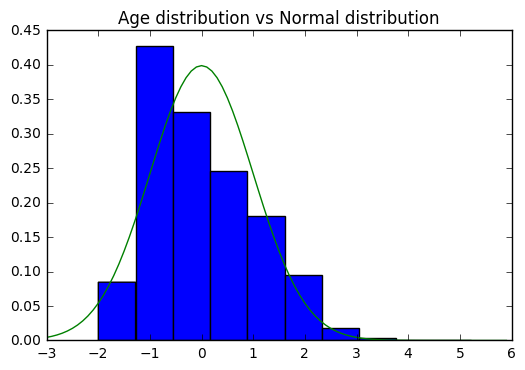

In [13]:
pl.hist(dis_age, normed = True)
pl.plot(arange(-3,6,0.1),norm.pdf(arange(-3,6,0.1),0,1))
pl.title('Age distribution vs Normal distribution')

If we have many samples, then the distribution of the mean age values from those samples will resemble the normal distribution.

### Standardize the age distribution to a distribution with mean value of 1 and standard deviation of 1

In [14]:
dis_age_expon = (df.age - df.age.mean())/df.age.std()+1

### Compared the standardized age distribution with the Exponential distribution (mean = 1, std = 1) using two tests

### Null Hypothesis: The biker age distribution follows the Exponential distribution
Significance level: 5%

### The KS Test

In [15]:
print ("age dis on normal dis", scipy.stats.kstest(dis_age_expon,'expon'))

age dis on normal dis KstestResult(statistic=0.16630003513114999, pvalue=0.0)


### Since the p-value (~0.0) is smaller than the significance level 5%, we are able to reject the hypothesis.

### The Anderson Test

In [16]:
print ("age dis on normal dis", scipy.stats.anderson(df.age, dist = 'expon'))

age dis on normal dis AndersonResult(statistic=186314.48622943391, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


### Since the statistic coefficient value is larger than 1 (The statistic coefficient for the significance level 5%), we are able to reject the null hypothesis.

### Graph

In [17]:
print(dis_age_expon.min())
print(dis_age_expon.max())

-0.998417357335
6.21322895306


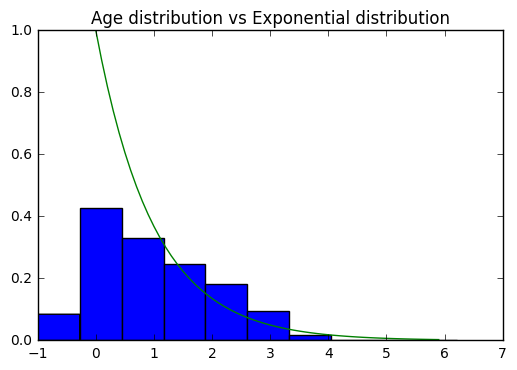

In [18]:
pl.hist(dis_age_expon, normed = True)
pl.plot(arange(0,6,0.1),scipy.stats.expon.pdf(arange(0,6,0.1)))
pl.title('Age distribution vs Exponential distribution')